1- Importing Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


2- Reading CSV File.

In [2]:
data = pd.read_csv("File 1.csv")
data=pd.DataFrame(data)

3- Encoding Categorical Columns.

In [3]:
label_encoder = LabelEncoder()
data['Crop'] = label_encoder.fit_transform(data['label'])

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = data[features]
y = data['Crop']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

4- Training Logistic Regression Model.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

5- Ploting And Visualizing.

c:\Users\Eng Hassan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


interactive(children=(FloatSlider(value=50.0, description='N', max=140.0, step=1.0), FloatSlider(value=50.0, d…

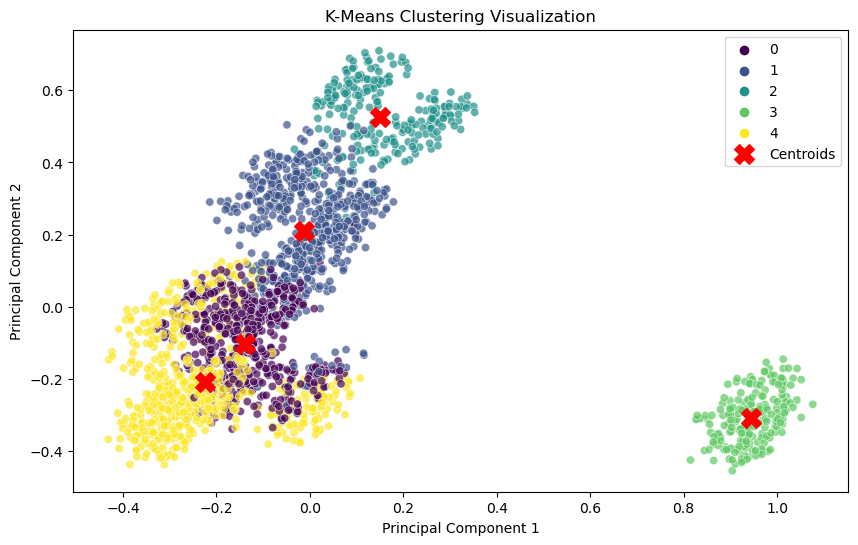

In [7]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]



def predict_crop(N, P, K, temp, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temp, humidity, ph, rainfall]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    return label_encoder.inverse_transform(prediction)[0]

widgets.interact(predict_crop, 
                 N=widgets.FloatSlider(min=0, max=140, step=1, value=50),
                 P=widgets.FloatSlider(min=0, max=145, step=1, value=50),
                 K=widgets.FloatSlider(min=0, max=205, step=1, value=50),
                 temp=widgets.FloatSlider(min=0, max=50, step=0.5, value=25),
                 humidity=widgets.FloatSlider(min=0, max=100, step=0.5, value=50),
                 ph=widgets.FloatSlider(min=0, max=14, step=0.1, value=7),
                 rainfall=widgets.FloatSlider(min=0, max=300, step=1, value=100))

centroids_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['Cluster'], palette='viridis', alpha=0.7)

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], color='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

6- Saving CSV File.

In [6]:
data.to_csv("clustered_data.csv", index=False)